In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import battery_param_pipeline as bpp
import matplotlib.pyplot as plt
import fitter

In [5]:

dfndb = bpp.liiondb.DFNDatabase()

In [31]:
query = """
        SELECT DISTINCT data.data_id,parameter.name, material.name, paper.paper_tag,data.raw_data
        FROM data
        JOIN paper ON paper.paper_id = data.paper_id
        JOIN material ON material.material_id = data.material_id
        JOIN parameter ON parameter.parameter_id = data.parameter_id
        WHERE parameter.name = 'diffusion coefficient'
        AND material.class = 'negative'
        """
df = dfndb.read_sql(query)
df

,data_id,name,name,paper_tag,raw_data
0,69,diffusion coefficient,Graphite,Ecker2015,"{{0.04291659469592768,0.0000000000002531898360..."
1,72,diffusion coefficient,Graphite,Ecker2015,"{{0.14962963,0.000000000000041723300000000003}..."
2,74,diffusion coefficient,Graphite,Schmalstieg2018,"{{0.033255915,0.000000000000109},{0.149546849,..."
3,138,diffusion coefficient,Graphite-Silicon,Chen2020,"{{0.033897846,0.00000000000000255848},{0.03789..."
4,139,diffusion coefficient,Graphite-Silicon,Chen2020,"{{1.0,0.000000000000023569299999999997},{1.0,0..."
5,302,diffusion coefficient,Graphite,Doyle1996,0.000000000000039
6,360,diffusion coefficient,Graphite,Levi1997,"{{0.03795318408342724,0.0000000000002872362616..."
7,361,diffusion coefficient,Graphite,Levi1997,"{{0.036675846258151616,0.000000000000232284946..."
8,362,diffusion coefficient,Graphite,Levi2003,"{{0.17,0.00000000000146}}"
9,363,diffusion coefficient,Graphite,Levi2003,"{{0.17,0.00000000000129}}"


In [32]:
values = df["raw_data"].to_numpy(dtype=float)
plt.hist(values);

ValueError: could not convert string to float: '{{0.04291659469592768,0.0000000000002531898360570985},{0.08025337997334403,0.00000000000004438292394020732},{0.12014956931041065,0.00000000000003194742634305545},{0.15796120718295306,0.000000000000026077962994674755},{0.19575227382393767,0.00000000000002255908580891848},{0.2357650334731653,0.0000000000000116865022242173},{0.27144412034088194,0.000000000000012386927328130893},{0.3100288936661386,0.000000000000020291954487412547},{0.3484165260222996,0.000000000000003260471640647865},{0.3866704453733347,0.0000000000000007640156635519088},{0.4264157790123111,0.0000000000000008417747371928056},{0.4641862744217376,0.0000000000000007717093525037831},{0.5018779134435263,0.0000000000000008837921553351043},{0.5412118224513462,0.0000000000000031091713222975717},{0.5766749113877059,0.000000000000006062184667385398},{0.6148036890800979,0.00000000000003595937210129948},{0.6545815938357071,0.0000000000000020323093806678467},{0.7681399348426814,0.0000000000000007802664217099548},{0.8089429726375879,0.0000000000000007728942922045022},{0.8823034129113143,0.0000000000000009658296743214142},{0.9220864604748132,0.000000000000000956699959421324},{0.9607500901877076,0.0000000000000012545776383613631},{0.9976360226401492,0.00000000000001395684713792463}}'

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 39.94it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,4646.717722,-63.810649,110.378949,inf,0.130035,0.864740
lognorm,4684.568438,-136.150684,113.477529,inf,0.119823,0.918172
gamma,4687.635638,-140.188447,113.489965,inf,0.126033,0.887219
rayleigh,4691.012203,-147.194751,110.559207,inf,0.135897,0.828736
norm,4730.604556,-136.359576,110.718895,inf,0.172013,0.569403


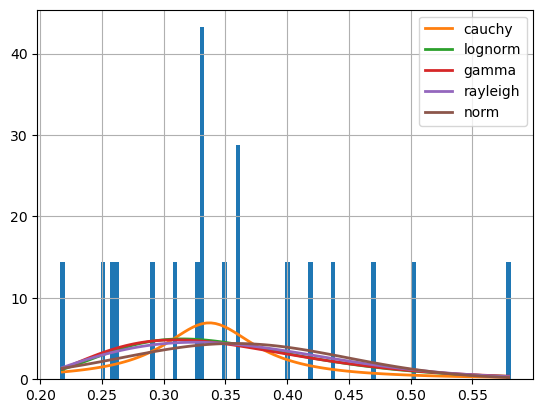

In [29]:
f = fitter.Fitter(values, distributions=fitter.get_common_distributions())
f.fit()
f.summary()

In [30]:
f.get_best(method="aic")

{'uniform': {'loc': 0.216, 'scale': 0.3652000000000001}}

In [21]:
f.df_errors

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi2,19367.610983,-51.408436,164.331336,inf,0.617887,5.475120e-09
expon,19020.819783,-222.631902,160.780279,inf,0.193548,3.132130e-01
cauchy,19505.666169,-180.874279,161.359208,inf,0.161225,5.354853e-01
rayleigh,19284.203118,-247.374424,161.096577,inf,0.166568,4.943549e-01
norm,19364.961120,-241.463078,161.192695,inf,0.145309,6.637018e-01
uniform,19193.041763,-289.935194,160.987592,inf,0.217391,1.959904e-01
powerlaw,18562.917891,-248.321794,163.355303,inf,0.205726,2.483275e-01
gamma,19689.338503,-150.690227,164.710265,inf,0.357988,3.816979e-03
lognorm,19298.035333,-232.139300,164.248563,inf,0.148526,6.374410e-01
exponpow,18992.501169,-176.634684,163.881504,inf,0.270090,5.677452e-02
